# PHAS0007 Reading Week assignment: Supplementary notebook

Authors: Louise Dash, Ben Waugh

Last updated: 2020-11-08

This notebook contains the following:

* The equations from the script for the Reading Week assignment, already typeset for you
* The code snippet you will need to paste for the curve_fit question
* An example of how to reference using the Harvard style within a Jupyter Notebook.

## Equations for the Reading Week assignment

You may copy and paste these equations into your own notebook as required (in which case make sure this notebook is included in your list of references). You should also make sure these equations are suitably referenced, i.e. include a reference either to the script (Dash and Lemos, 2019) or to the appropriate section of Hughes and Hase (Hughes and Hase, 2010), etc.


Equation (1):
$$ v = H_0 D $$ 

Equation (2): 
$$ w_i = \frac{1}{(\Delta y_i)^2} $$

Equations (3,4): 
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}\\
= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$
    
Equation (5):
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$

Equation (6):
$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$

Equation (7): 
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$

Equation (8):
$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} $$



## Code examples for polyfit

Setting things up for all our fitting examples:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The (x,y) data to fit, and errors on y:
x  = np.array([0, 1, 2, 3, 4])
y  = np.array([-1, 0.2, 0.9, 2.1, 3.8])
dy = np.array([0.2, 0.3, 0.4, 0.3, 0.45])

### Unweighted fit

slope = 1.15 ± 0.10
y-intercept = -1.10 ± 0.23


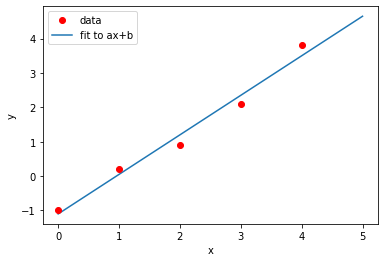

In [2]:
# Adapted from code by I. Llorente-Garcia, UCL Physics and Astronomy
# "Script for linear fitting using Python"
# https://moodle.ucl.ac.uk/course/view.php?id=16941&section=4

# Fit to a line ax+b (a line is a first-order polynomial).
# We will obtain the uncertainties of slope and intercept from the covariance matrix.
# Degree of polynomial we want to fit, use 1 for a line:
degree = 1 
fit, cvm = np.polyfit(x,y,degree,cov=True) # fit function
# Outputs of np.polyfit are fit parameters (fit) and covariance matrix (cvm)
# The slope is the first element of fit: a = fit[0].
# The intercept is the second element of fit: b = fit[1].
# To obtain the uncertainties of fit parameters we get the diagonal elements
# of the covariance matrix:
dfit = [np.sqrt(cvm[i,i]) for i in range(2)] 
# The error of the slope is dfit[0].
# The error of the intercept is dfit[1].
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope = {0:0.2f} \xb1 {1:0.2f}".format(fit[0], dfit[0]))
print(u"y-intercept = {0:0.2f} \xb1 {1:0.2f}".format(fit[1], dfit[1]))

# Plot the data points together with the fit:
xline = np.array([0, 5]) #create array to plot fitted line
yline = fit[0]*xline + fit[1] #calculate fitted line for every xfit point
plt.plot(x, y, 'ro', label="data")
plt.plot(xline, yline, zorder=-1, label="fit to ax+b")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Weighted fit

slope = 1.10 ± 0.09
y-intercept = -1.02 ± 0.18


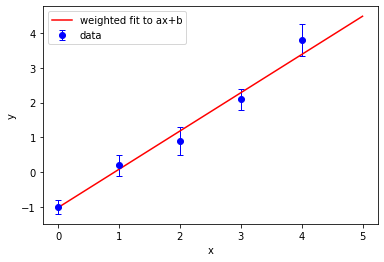

In [3]:
# First calculate the weights for the y coordinate. 
# Enter errors as an array of 1/sigma for Gaussian uncertainties (not 1/sigma**2):
yErrors = 1/dy
# Perform weighted fit: fit = parameters, cvm = covariance matrix
fit, cvm = np.polyfit(x,y,degree,w=yErrors,cov='unscaled')
# Outputs and errors of fitted parameters are same as before.
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]
# Print fit parameters with their errors (to 2 decimal places):
print(u"slope = {0:0.2f} \xb1 {1:0.2f}".format(fit[0], dfit[0]))
print(u"y-intercept = {0:0.2f} \xb1 {1:0.2f}".format(fit[1], dfit[1]))

# Plot the data points together with the fit:
xline = np.array([0, 5]) #create array to plot fitted line
yline = fit[0]*xline + fit[1] #calculate fitted line for every xfit point
# Plot points with error bars:
plt.errorbar(x, y, yerr = dy, fmt="bo", linewidth=1, capsize=3, label="data")
#plt.plot(x, y, 'ro', label="data")
plt.plot(xline, yline,'r', label="weighted fit to ax+b")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Code examples for curve_fit

In [4]:
### Use scipy's curve_fit function to fit the data
### Louise Dash, October 2019
###

from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize

# The code below (lines 9-16) is a function. We'll be covering functions after reading week.

def straight_line(x,m,c):
    """Calculates a straight line y = mx+c
    Inputs: x value (or set of x values)
            gradient of straight line m
            y-intercept of straight line c
    Returns: the corresponding y value(s)"""
    y = m*x + c # equation for straight line
    return y

# Unweighted fit:
# poptUW: Optimized parameters for the unweighted fit
# pcovUW: matrix of covariance for the unweighted fit
#   xi, yi: rename these to whatever variable names you have used
#   for your x and y data respectively.  
poptUW,pcovUW = curve_fit(straight_line,x,y)
print ("poptUW :\n", poptUW)
print ("pcovUW :\n", pcovUW)

# Weighted fit
# poptW: Optimized parameters for the weighted fit
# pcovW: matrix of covariance for the weighted fit
#   xi, yi: rename these to whatever variable names you have used
#   for your x and y data respectively.  
poptW,pcovW = curve_fit(straight_line,x,y, sigma=dy, absolute_sigma=True)
print ("poptW :\n", poptW)
print ("pcovW :\n", pcovW)

poptUW :
 [ 1.15 -1.1 ]
pcovUW :
 [[ 0.00916667 -0.01833333]
 [-0.01833333  0.055     ]]
poptW :
 [ 1.09932649 -1.01642078]
pcovW :
 [[ 0.00874022 -0.01147659]
 [-0.01147659  0.03218987]]


## Bibliography

* Dash, L and Lemos, P (2019). _"PHAS0007 Reading Week Task 2019: Using least-squares fitting to calculate the Hubble constant"_. UCL Moodle resource available from https://moodle.ucl.ac.uk/course/view.php?id=10648&section=13 \[accessed 1 November 2019\]

* Hughes, I. and Hase, T. (2010). _"Measurements and their uncertainties. A practical guide to modern error analysis"_. Oxford University Press. http://UCL.eblib.com/patron/FullRecord.aspx?p=584562.
